In [2]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats as stats




In [3]:
%matplotlib inline

In [4]:
#read in the cleaned data from csv file
df = pd.read_csv('airbnbdfClean.csv', encoding = 'unicode_escape')
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,city,house_title,house_type,price,owner_name,no_of_reviews,rating,occupancy,occupancy_lst,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
215,215,222.0,Manhattan,"Cozy Room in Astoria,15min with Ferry To Manha...",Private room in apartment,750.0,Darko,300,4.5,"['3 guests', '1 bedroom', '1 bed', '1 shared b...","[""['3 guests'"", "" '1 bedroom'"", "" '1 bed'"", "" ...",[,"""",[,',NaN,NaN,NaN
175,175,180.0,Manhattan,Amazing Sunny Apartment in the Lower East Side,Entire apartment,1690.0,Todd,770,4.5,"['3 guests', 'Studio', '1 bed', '1 bath', 'ó°...","[""['3 guests'"", "" 'Studio'"", "" '1 bed'"", "" '1 ...",[,"""",[,',NaN,NaN,NaN
112,112,114.0,Manhattan,Centrally Located Comfy 2BR Midtown Apartment,Entire apartment,2290.0,Akon,980,5.0,"['6 guests', '2 bedrooms', '3 beds', '1 bath',...","[""['6 guests'"", "" '2 bedrooms'"", "" '3 beds'"", ...",[,"""",[,',NaN,NaN,NaN
98,98,99.0,Manhattan,AMAZING 1 BR- TIME SQUARE-SLEEPS 4,Entire apartment,2000.0,E. M.,3240,4.5,"['4 guests', '1 bedroom', '1 bed', '1 bath', '...","[""['4 guests'"", "" '1 bedroom'"", "" '1 bed'"", "" ...",[,"""",[,',NaN,NaN,NaN
5,5,5.0,Manhattan,Modern & Trendy 2-Bedroom 1 Bath Lower Manhattan,Entire apartment,900.0,Alex,1170,5.0,"['5 guests', '2 bedrooms', '3 beds', '1 bath',...","[""['5 guests'"", "" '2 bedrooms'"", "" '3 beds'"", ...",[,"""",[,',NaN,NaN,NaN


In [5]:
airdf = df[['city','house_title','house_type','price','owner_name','no_of_reviews','rating','no_of_guest','house_size','no_of_beds','no_of_baths','house','beds','bath']]
airdf.sample(5)

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
36,Manhattan,Soho Apartment Stylish & Central,Entire condominium,1900.0,Arne,3460,4.5,[,"""",[,',NaN,NaN,NaN
201,Manhattan,New Modern 1 Bedroom Apt - Hip Downtown Manhattan,Entire apartment,2400.0,Mike,2080,5.0,[,"""",[,',NaN,NaN,NaN
193,Manhattan,Stylish 2BR Ã¢ÂÂ Sleeps 6 Ã¢ÂÂ C.Park,Entire apartment,1900.0,Gilad,1090,4.0,[,"""",[,',NaN,NaN,NaN
143,Manhattan,Quiet Soho/Nolita Garden Alcove Studio,Entire apartment,1530.0,Deeva,1550,5.0,[,"""",[,',NaN,NaN,NaN
230,Manhattan,DaDukes Dreams,Private room in house,850.0,Alberto,660,5.0,[,"""",[,',NaN,NaN,NaN


In [6]:
airdf.iloc[111,1]

'Ã¢Â\x9dÂ¤Ã¯Â¸Â\x8f Furnished One Bedroom with Terrace!! Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85Ã¢Â\x98Â\x85'

In [7]:
" ".join(re.findall('[a-zA-Z]+', airdf.iloc[111,1]))

'Furnished One Bedroom with Terrace'

In [11]:
# function to clean weird chars like Â¤Ã¯Â¸Â 
def get_alphabets(s):
    return " ".join(re.findall('[a-zA-Z]+', s))

airdf = airdf.assign(house_title = airdf.house_title.apply(get_alphabets))

airdf = airdf.assign(no_of_guest = airdf.no_of_guest.astype(int))
airdf = airdf.assign(price = airdf.price.astype(int))

ValueError: invalid literal for int() with base 10: '['

In [ ]:
airdf

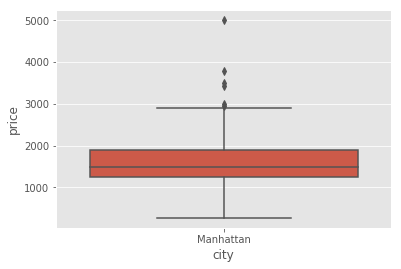

In [12]:
sns.boxplot(x = 'city', y= 'price', data=airdf)

Text(0.5, 1.0, 'Price range analysis by Manhattan')

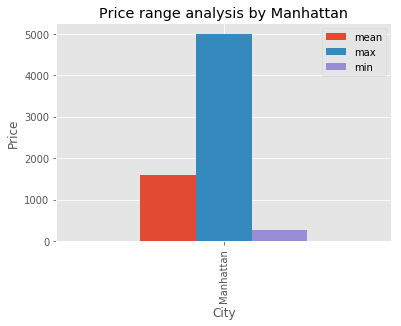

In [14]:
airCityPrice = airdf.groupby('city').agg(['mean','max','min']).price

airCityPrice.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price range analysis by Manhattan')

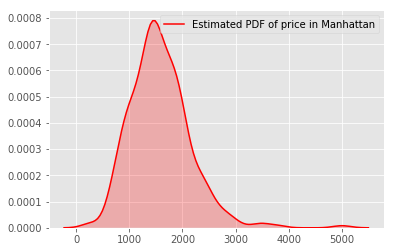

In [16]:
sns.kdeplot(airdf[airdf.city == 'Manhattan'].price, shade=True, color = "red" , label='Estimated PDF of price in Manhattan')

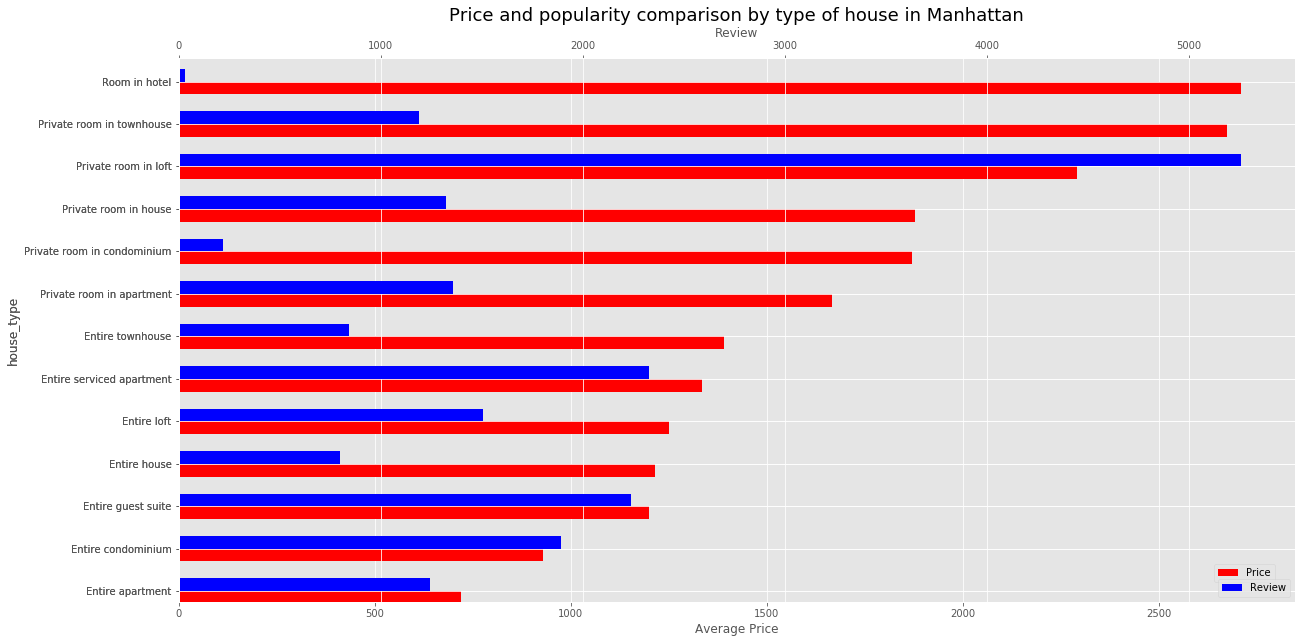

In [18]:
# Plot Price and popularity comparison by type of House in Manhattan

priceManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean()
reviewManh = airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_reviews'].mean()

fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(20, 10)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

p1 = priceManh.sort_values(ascending=True).plot(kind='barh', color='red', ax=ax, width=width, position =1, legend = True,label = 'Price')
p2 = reviewManh.plot(kind='barh', color='blue', ax=ax2, width=width, position=0,legend = True,label = 'Review')


ax.set_xlabel('Average Price')
ax2.set_xlabel('Review')
#plt.ylabel('House Type')
plt.title('Price and popularity comparison by type of house in Manhattan', fontsize=18)
ax2.legend(loc = 'lower right')
ax.legend(loc = 'lower right', borderaxespad = 2)
plt.show()

In [20]:
# type analysis in Manhattan by house size

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['no_of_guest'].mean().sort_values().plot(kind='barh')
plt.xlabel('Number of guest accomodation')
plt.ylabel('Houses in Manhattan')
plt.title('How many guest can this house accomodate?')

DataError: No numeric types to aggregate

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'Houses in Manhattan')

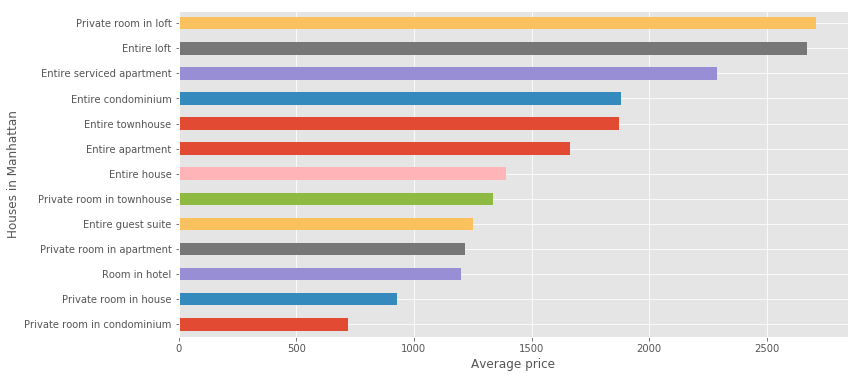

In [22]:
# test not to be used in presentation
# price analysis in Manhattan by house type

plt.figure(figsize=(12,6))
airdf[airdf.city == 'Manhattan'].groupby('house_type')['price'].mean().sort_values().plot(kind='barh')
plt.xlabel('Average price')
plt.ylabel('Houses in Manhattan')



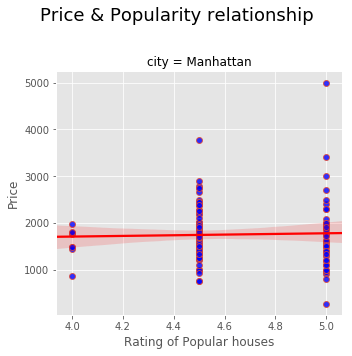

In [47]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews > np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

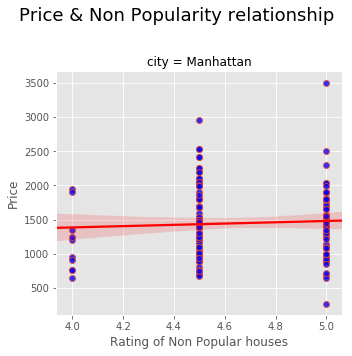

In [49]:
lmplt = sns.lmplot(x = 'rating', y= 'price', data=airdf[airdf.no_of_reviews <= np.mean(airdf.no_of_reviews)], hue="city",
          line_kws={'color': 'red'},fit_reg = True,scatter_kws={'facecolors':'blue'}, col = 'city')
lmplt = lmplt.set_axis_labels("Rating of Non Popular houses", "Price")
fig = lmplt.fig
fig.suptitle("Price & Non Popularity relationship", fontsize=18)
lmplt.fig.subplots_adjust(top=.8)

In [53]:
# for test, might not use in presentation
# Size and type of most popular houses
airManh = airdf[airdf.city == 'Manhattan'] 
no_of_revw = airManh.no_of_reviews.sort_values(ascending = False).nlargest(10)
airManh[airManh.no_of_reviews.isin(no_of_revw) ]

,city,house_title,house_type,price,owner_name,no_of_reviews,rating,no_of_guest,house_size,no_of_beds,no_of_baths,house,beds,bath
7,Manhattan,Massive DUPLEX BR BATH East Village,Entire apartment,1980.0,Seith,3400,4.0,[,"""",[,',NaN,NaN,NaN
12,Manhattan,Spacious Room in East Village NoHo,Private room in apartment,1290.0,Sne,3810,5.0,[,"""",[,',NaN,NaN,NaN
13,Manhattan,Manhattan Lux Loft Like Love Lots Look,Private room in loft,2710.0,Carol,5260,5.0,[,"""",[,',NaN,NaN,NaN
24,Manhattan,Near Times Square and Hell s Kitchen,Private room in apartment,1400.0,Claude,3430,4.5,[,"""",[,',NaN,NaN,NaN
36,Manhattan,Soho Apartment Stylish Central,Entire condominium,1900.0,Arne,3460,4.5,[,"""",[,',NaN,NaN,NaN
90,Manhattan,Best of SOHO Gorgeous bedroom,Entire condominium,2750.0,Arne,3430,4.5,[,"""",[,',NaN,NaN,NaN
98,Manhattan,AMAZING BR TIME SQUARE SLEEPS,Entire apartment,2000.0,E. M.,3240,4.5,[,"""",[,',NaN,NaN,NaN
125,Manhattan,TriBeCa Sq Ft w Priv Elevator,Entire loft,5000.0,Chester & Jon,4310,5.0,[,"""",[,',NaN,NaN,NaN
128,Manhattan,private bedroom w private bathroom on Central ...,Private room in apartment,1600.0,Arlette,3150,4.5,[,"""",[,',NaN,NaN,NaN
273,Manhattan,Big st Meal Kind Host Ace Space,Private room in apartment,1340.0,Nancy,3140,4.5,[,"""",[,',NaN,NaN,NaN


In [42]:
airdf[airdf.city=='Manhattan'].corr()

,price,no_of_reviews,rating,house,beds,bath
price,1.000000,0.279812,0.025379,NaN,NaN,NaN
no_of_reviews,0.279812,1.000000,-0.057659,NaN,NaN,NaN
rating,0.025379,-0.057659,1.000000,NaN,NaN,NaN
house,NaN,NaN,NaN,NaN,NaN,NaN
beds,NaN,NaN,NaN,NaN,NaN,NaN
bath,NaN,NaN,NaN,NaN,NaN,NaN
